# NYC Airbnb EDA Project



## 1️⃣ Introduction

Այս աշխատանքի ընթացքում ուսումնասիրվել են Airbnb հարթակի Նյու Յորք քաղաքում առկա բնակարանների տվյալները։ Տվյալների նպատակն է հասկանալ, թե ինչ գործոններ կարող են ազդել բնակարանների գների վրա և ինչ ընդհանուր օրինաչափություններ կան տվյալներում։ Տվյալները վերցված են Kaggle հարթակից և պարունակում են թե՛ քանակական, թե՛ որակական հատկանիշներ, ինչպես նաև բաց թողնված արժեքներ։

Տվյալների վերլուծության համար օգտագործվել են հետևյալ Python գրադարանները․

pandas – տվյալների ընթերցում և մշակում

numpy – թվաբանական հաշվարկներ

matplotlib – տվյալների վիզուալ ներկայացում

Տվյալները ներբեռնվել են CSV ֆայլից և պահվել են pandas DataFrame կառուցվածքում։ Dataset-ը պարունակում է Airbnb հայտարարությունների տվյալներ Նյու Յորք քաղաքից (2019 թ.)։

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset-ը կարդալ
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2️⃣ EDA

### Dataset-ի չափը և կառուցվածքը

# Տվյալների նախնական ուսումնասիրություն

Այս փուլում կատարվել է տվյալների նախնական դիտում՝ առաջին տողերի, չափերի և կառուցվածքի ուսումնասիրությամբ։

In [9]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     38833

# Նկարագրական վիճակագրություն

Հաշվարկվել են հիմնական վիճակագրական չափանիշները՝ միջին, նվազագույն, առավելագույն արժեքներ և քառորդականներ։

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night,high_availability
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498,70.190038,0.272686
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271,157.634605,0.445345
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.040000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,20.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,44.500000,0.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,81.666667,1.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,8000.000000,1.000000


### Բաց թողնված արժեքներ

In [3]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Ուսումնասիրվել է բացակայող (NaN) արժեքների քանակը յուրաքանչյուր սյունակում։

## Տվյալների մաքրում և բացակայող արժեքների մշակում

Տվյալների որակն ապահովելու համար իրականացվել է մաքրման փուլ, որի ընթացքում մշակվել են բացակայող և անտրամաբանական արժեքները։



*   reviews_per_month սյունակում բացակայող արժեքները փոխարինվել են 0-ով, քանի որ բացակայությունը նշանակում է, որ տվյալ հայտարարությունը չունի կարծիքներ տվյալ ամսում։




In [10]:
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipython-input-1792330394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)




*   Այլ սյունակներում բացակայող արժեքներով տողերը հեռացվել են՝ վերլուծության վրա բացասական ազդեցությունը նվազեցնելու համար։



In [11]:
df.dropna(inplace=True)

## Անտրամաբանական արժեքների հեռացում
Հեռացվել են այն տողերը, որտեղ

*   գինը (price) փոքր կամ հավասար է 0-ին, քանի որ դրանք չեն ներկայացնում իրական շուկայական տվյալներ։



In [ ]:
df = df[df['price'] > 0]

### Price-ի բաշխում

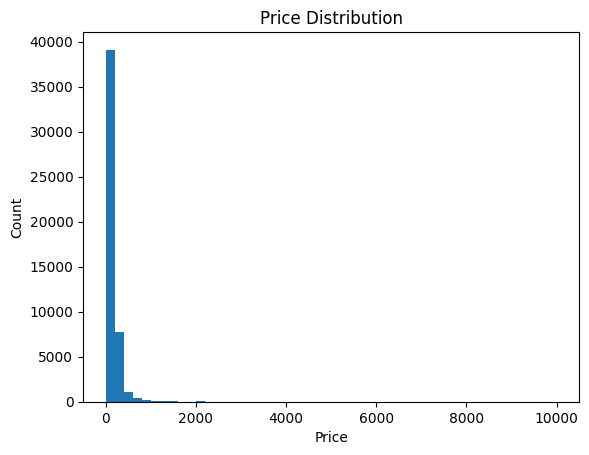

In [4]:
plt.hist(df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Borough-ների ուսումնասիրություն

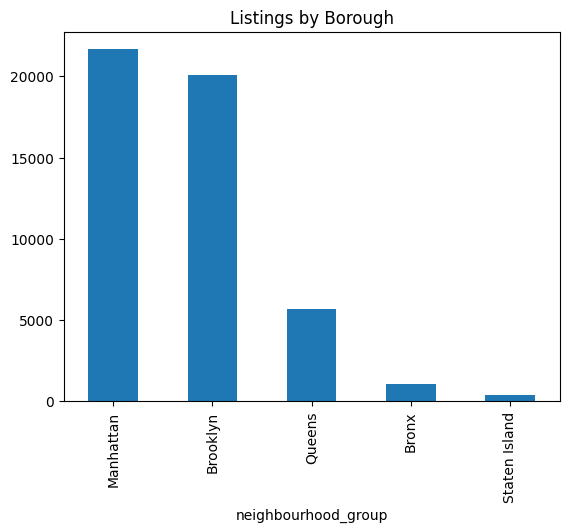

In [5]:
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('Listings by Borough')
plt.show()

## 4️⃣ Feature Engineering

In [7]:
df['price_per_night'] = df['price'] / df['minimum_nights']
df['high_availability'] = df['availability_365'].apply(lambda x: 1 if x > 200 else 0)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night,high_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667,0


## 5️⃣ Insights & Conclusions

Աշխատանքի ընթացքում պարզ դարձավ, որ Airbnb բնակարանների գների վրա ամենամեծ ազդեցությունն ունեն գտնվելու վայրը և սենյակի տեսակը։ Manhattan և Brooklyn շրջաններում գները միջինում ավելի բարձր են, իսկ private room-ները հիմնականում ավելի մատչելի են ամբողջական բնակարանների համեմատ։ Նոր ստեղծված հատկանիշները թույլ տվեցին տվյալները դիտարկել ավելի գործնական տեսանկյունից և կարող են օգտակար լինել հետագա վերլուծությունների կամ մոդելավորման համար։